# Estudio sobre la deuda de los países #

Se va a tratar un dataset del Banco Mundial que habla sobre las estadísticas de las deudas de los países, y el cual se encuentra en Kaggle. La descripción de las variables es compleja, aunque se puede encontrar en: http://databank.worldbank.org/data/download/site-content/ids2015.pdf (Página 17). Para comenzar, se van a cargar los datos:

In [5]:
import pandas as pd
df = pd.read_csv("international-debt-statistics.csv", sep = ",").drop("Unnamed: 59", 1)
df.head()

,"﻿""Country Name""",Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Echando un primer vistazo al dataset, se puede ver que para cada país (Country Name + Country Code) se tienen distintos factores económicos (Indicator Code) con valores para la línea temporal entre 1970 y 2024. Existe una gran cantidad de nulos por parte de las variables temporales, por lo que se va a ver el porcentaje de nulos por variable:

In [6]:
print("Cantidad de nulos: ")
print(df.isnull().sum())
print("-----------")
print("Porcentaje de nulos: ")
print(df.isnull().sum()/len(df) * 100)

Cantidad de nulos: 
﻿"Country Name"        0
Country Code           0
Indicator Name         0
Indicator Code         0
1970               10706
1971               10358
1972                9980
1973                9959
1974                9860
1975                9741
1976                9604
1977                9218
1978                8788
1979                8745
1980                8675
1981                7156
1982                7104
1983                7102
1984                6898
1985                6693
1986                6677
1987                6666
1988                6739
1989                4774
1990                4755
1991                4512
1992                2976
1993                1920
1994                1498
1995                1472
1996                1452
1997                1431
1998                1439
1999                1256
2000                1265
2001                1265
2002                1246
2003                1236
2004                1213
2005 

Hasta 1992 se encuentra una cantidad de nulos considerable (más de un 10%), debido a la falta de información de una gran cantidad de paises. Análogamente, a partir de 2015, la cantidad de nulos supera al 88%, siendo realmente predicciones futuras más que datos contrastados.

## Analizando la deuda externa ##

Se va a analizar la deuda externa (variable DT.DOD.DECT.CD) de cada país para la primera década del siglo XXI, es decir, entre el 2000 y el 2010. Es importante comentar que los países que no disponían de información para cualquiera de esos años han sido descartados.

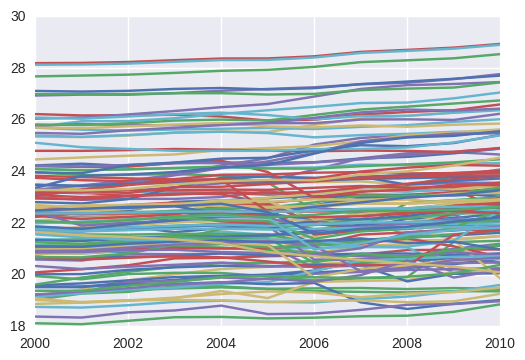

Country Name,Albania,Algeria,All developing countries,Angola,Armenia,Azerbaijan,Bangladesh,Belarus,Belize,Benin,...,Turkmenistan,Uganda,Ukraine,Upper middle income,Uzbekistan,Vanuatu,Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
2000,1.122296e+09,2.547693e+10,1.742960e+12,9.763470e+09,1.009643e+09,1.524261e+09,1.559607e+10,2.604108e+09,5.279020e+08,1.369959e+09,...,2.509436e+09,3.535146e+09,1.389009e+10,1.043220e+12,4.979871e+09,95670000.0,1.285928e+10,5.162399e+09,5.811476e+09,3.832043e+09
2001,1.154850e+09,2.276389e+10,1.756875e+12,8.776913e+09,1.401649e+09,1.459853e+09,1.492421e+10,2.780349e+09,5.978810e+08,1.448760e+09,...,2.229529e+09,3.768223e+09,2.218211e+10,1.076943e+12,5.208444e+09,92032000.0,1.261666e+10,5.197891e+09,6.189777e+09,3.644778e+09
2002,1.181526e+09,2.304022e+10,1.820742e+12,9.110398e+09,1.711690e+09,1.626957e+09,1.663286e+10,3.378292e+09,6.973290e+08,1.585651e+09,...,2.060367e+09,4.014527e+09,2.342315e+10,1.116698e+12,5.151824e+09,112584000.0,1.334681e+10,5.337942e+09,6.674671e+09,3.978768e+09
2003,1.552159e+09,2.377485e+10,1.953504e+12,9.099853e+09,1.994268e+09,1.876746e+09,1.838549e+10,3.760979e+09,9.095300e+08,1.460923e+09,...,1.889766e+09,4.565233e+09,2.574826e+10,1.194071e+12,5.295598e+09,121146000.0,1.595835e+10,5.524634e+09,6.874318e+09,4.603900e+09
2004,1.606136e+09,2.242665e+10,2.081974e+12,9.786141e+09,2.106357e+09,2.019786e+09,1.965923e+10,4.584153e+09,9.278910e+08,1.586768e+09,...,1.630781e+09,4.769348e+09,3.068915e+10,1.294476e+12,5.215731e+09,145931000.0,1.799307e+10,5.616361e+09,7.540235e+09,4.953634e+09
2005,2.101163e+09,1.709240e+10,2.089796e+12,1.222396e+10,1.968027e+09,2.118242e+09,1.844882e+10,5.283532e+09,9.888200e+08,1.536152e+09,...,1.157800e+09,4.436715e+09,3.370593e+10,1.343201e+12,4.655813e+09,105348000.0,1.903868e+10,5.500561e+09,5.458981e+09,4.444631e+09
2006,2.465359e+09,5.910801e+09,2.267447e+12,9.890494e+09,2.136305e+09,2.687517e+09,2.010578e+10,6.543942e+09,1.023887e+09,6.290010e+08,...,9.910510e+08,1.276225e+09,5.248666e+10,1.507680e+12,4.487901e+09,107584000.0,1.864855e+10,5.705769e+09,2.375621e+09,4.908101e+09
2007,2.897759e+09,6.134509e+09,2.693260e+12,1.193168e+10,3.078652e+09,3.728508e+09,2.137264e+10,1.248816e+10,1.048500e+09,7.549130e+08,...,8.537490e+08,1.628567e+09,7.892908e+10,1.811890e+12,4.647813e+09,123899000.0,2.328472e+10,6.152424e+09,2.857153e+09,5.707379e+09
2008,4.238095e+09,6.246392e+09,2.908884e+12,1.550157e+10,3.609238e+09,4.465748e+09,2.292939e+10,1.512151e+10,1.252490e+09,9.718140e+08,...,7.457210e+08,2.268362e+09,9.826630e+10,1.942263e+12,5.108326e+09,150881000.0,2.648763e+10,6.318635e+09,3.079658e+09,5.710814e+09
2009,4.310066e+09,7.405467e+09,3.175081e+12,1.701427e+10,4.932598e+09,4.754598e+09,2.459598e+10,2.205383e+10,1.270864e+09,1.317169e+09,...,6.614750e+08,2.738678e+09,1.043271e+11,2.102098e+12,6.961540e+09,155309000.0,3.308383e+10,6.734195e+09,3.774356e+09,6.000141e+09


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
df["Country Name"] = df.iloc[:,0]
deuda_externa2 = df[df["Indicator Code"] == "DT.DOD.DECT.CD"].set_index("Country Name").loc[:, "2000":"2010"]
plt.plot(np.log(deuda_externa2.dropna().T))
plt.show()
deuda_externa2.dropna().T

El gráfico muestra que existen países que se mantienen de forma estable mientras que otros tienen grandes fluctuaciones (subidas o bajadas bruscas) en cuanto a deuda externa. Aun así, esa visualización no es muy apropiada, ya que debido a la gran cantidad de países involucrados (128 exactamente) se hace inviable obtener conocimiento. 

Por ello, se propone buscar los cuatro paises con mayor deuda en el último año (2010) y los que menos, para ver el contraste entre éstos.

## Filtrando países ##

In [11]:
df["Country Name"].unique()
agrupaciones = ["All developing countries", "East Asia & Pacific", "Europe & Central Asia",
               "Latin America & Caribbean", "Lower middle income", "Middle East & North Africa",
               "Middle income", "Low income", "Upper middle income", "South Asia", "Sub-Saharan Africa"]

def quitarAgrupaciones(country):
    return country in agrupaciones

df["esAgrupacion"] = df["Country Name"].apply(lambda x: quitarAgrupaciones(x))
df_sinAgrup = df[df["esAgrupacion"] == False]
df_sorted_deuda = df_sinAgrup[df_sinAgrup["Indicator Code"] == "DT.DOD.DECT.CD"][["Country Name", 
                        "2010"]].dropna().sort_values("2010", 
                        ascending = False)

df_sorted_deuda["RANK"] = range(1,df_sorted_deuda["2010"].size+1)
df_sorted_deuda.set_index("RANK", inplace=True)
df_sorted_deuda.iloc[:4,].append(df_sorted_deuda.iloc[-4:,])

,Country Name,2010
RANK,,
1,China,5.597721e+11
2,Brazil,3.523644e+11
3,Turkey,2.991132e+11
4,India,2.916505e+11
117,Solomon Islands,2.307570e+08
118,Sao Tome and Principe,1.808810e+08
119,Vanuatu,1.733300e+08
120,Tonga,1.536510e+08


Los países con mayor deuda externa son:
1. China.
2. Brasil.
3. Turquía.
4. India

Y los que menos:
1. Tonga.
2. Vanuatu.
3. Santo Tomé y Príncipe.
4. Islas Solomón.

Estos resultados pueden deberse a que, los países con más deuda, son países extensos, con grandes cantidades de población, pero sobre todo que tienen una importancia económica a nivel mundial muy importante. Los países que menos deuda externa tienen son países pequeños, con pocas relaciones comerciales externas y de poco impacto económico externo.

Realizando el estudio anterior únicamente para estos 8 países se obtiene:

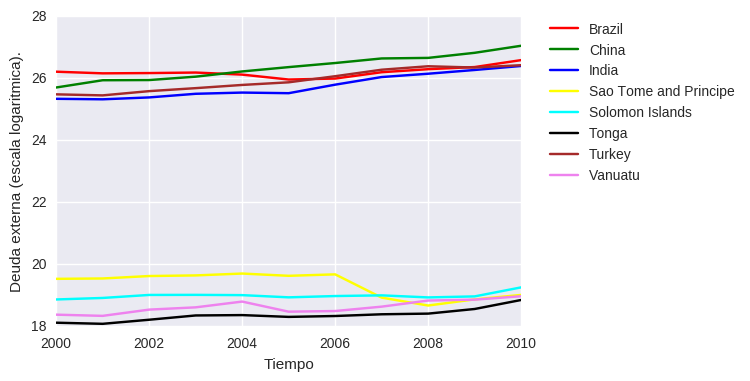

In [14]:
df["Country Name"] = df.iloc[:,0]
deuda_externa = df[df["Indicator Code"] == "DT.DOD.DECT.CD"][["Country Name", "2000", "2001", "2002", "2003", "2004", 
                                                              "2005", "2006", "2007", "2008", "2009", "2010",
                                                              "Indicator Code"]]
paises_filtro = ["Brazil", "China", "India", "Sao Tome and Principe", "Solomon Islands", "Tonga", 
                 "Turkey", "Vanuatu"]
deuda_externa_top = deuda_externa[deuda_externa["Country Name"].isin(paises_filtro)]
deuda_externa_top = deuda_externa_top[deuda_externa_top["Indicator Code"] == "DT.DOD.DECT.CD"].set_index("Country Name").loc[:, "2000":"2010"]
plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow', 'cyan', 'black', 'brown', 'violet'])
plt.plot(np.log(deuda_externa_top.T))
plt.xlabel("Tiempo")
plt.ylabel("Deuda externa (escala logaritmica).")
plt.legend(paises_filtro, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Ahora la visualización es mucho más clara que antes, centrándose en la diferencia de deuda externa entre los países seleccionados. Ahora se puede apreciar que Santo Tomé y Príncipe sufrió una baja considerable de deuda externa en 2006, o que la tendencia de todos los países es aumentar su deuda externa (a un ritmo considerable). También los países con menor deuda externa comienzan en el 2000 con valores muy diferentes, pero para 2010 acaban convergiendo en valores muy próximos.

Una pregunta puede ser si está relacionada la deuda externa con la población de los países. Se va a responder a esa pregunta para los países anteriores. Para ello se ha buscado su población, obteniendo los siguientes valores:
1. China: 1.369.811.000 habitantes.
2. Brasil: 204.450.649 habitantes.
3. Turquía: 79.414.269 habitantes.
4. India: 1.210.193.422 habitantes.
----
5. Tonga: 103.036 habitantes.
6. Vanuatu: 266.937 habitantes.
7. Santo Tomé y Príncipe: 193.413 habitantes.
8. Islas Solomón: 609.883 habitantes.

Estos datos obtenidos se han fusionado con los datos anteriores, para obtener:

In [15]:
df_8_pobl = pd.read_csv("Poblaciones.csv", sep = ";")
df_8 = df_sorted_deuda.iloc[:4,].append(df_sorted_deuda.iloc[-4:,]).reset_index()
df_obs = df_8_pobl.join(df_8)[["Pais", "Poblacion", "2010"]]
df_obs

0.767368124906


,Pais,Poblacion,2010
0,China,1369811000,5.597721e+11
1,Brazil,204450649,3.523644e+11
2,Turkey,79414269,2.991132e+11
3,India,1210193422,2.916505e+11
4,Solomon Islands,609883,2.307570e+08
5,Sao Tome and Principe,193413,1.808810e+08
6,Vanuatu,266937,1.733300e+08
7,Tonga,103036,1.536510e+08


Para conocer si existe correlación entre la población y la deuda externa en 2010 se puede realizar:

In [16]:
print(df_obs["2010"].corr(df_obs["Poblacion"]))

0.767368124906


Obtiendo un valor bastante alto, por lo que se puede considerar que existe una correlación entre la población de los países y su deuda externa para el año 2010 (aunque correlación no perfecta).

## Calculando deuda externa con GNI ##

Ya que se ha trabajado con la deuda externa, se va a calcular el ratio con el GNI, buscando los países con ratio más alto entre los años 2000 y 2010:

In [89]:
# EL GNI corresponde al indicador: NY.GNP.MKTP.CD, Página 17.
deuda_externa = df_sinAgrup[df_sinAgrup["Indicator Code"] == "DT.DOD.DECT.CD"].set_index("Country Name").loc[:,"2000":"2010"].T.mean()
gni = df_sinAgrup[df_sinAgrup["Indicator Code"] == "NY.GNP.MKTP.CD"].set_index("Country Name").loc[:,"2000":"2010"].T.mean()
ratio = deuda_externa / gni
ratio.sort_values(ascending = False).head(10)

Country Name
Liberia                  5.587608
Sao Tome and Principe    1.996349
Guinea-Bissau            1.740642
Lao PDR                  1.205822
Congo, Rep.              1.115035
Guyana                   1.014120
Guinea                   0.975977
Burundi                  0.967695
Kyrgyz Republic          0.965270
Kazakhstan               0.944653
dtype: float64

Curiosamente el único representado entre estos 10 países con mayor ratio deuda externa - GNI es Santo Tomé y Principe, el tercer país con menos deuda. Estos valores obtenidos indican la cantidad de deuda externa por cantidad de GNI, y los valores que se observan cogen los siguientes rangos:
* Si ratio > 1: significa que tienen mayor deuda que GNI. En el caso más extremos, el de Liberia, se obtiene que la deuda externa del país es aproximadamente 5.59 veces el GNI que posee, algo que podría analizarse como una gran deuda que no puede soportar. Se podría decir que debe 5.59 veces al exterior el "valor" del propio país.
* Si ratio = 1 (o muy próximo): significa que la deuda y el GNI están compensados, con valores muy próximos.
* Si ratio < 1: significa que el país contiene una cantidad de deuda menor que el GNI.

## Otros agregados: exportaciones e importaciones ##

Otros agregados importantes de interés pueden ser las exportaciones y las importaciones. ¿Los países exportan más que importan, o viceversa? ¿Existen países con muchas importanciones y bajas exportaciones, o viceversa? ¿Las exportaciones e importaciones de todos los países en conjunto siguen una regresión? Todas esas preguntas se resuelven con el siguiente gráfico:

(0, 35)

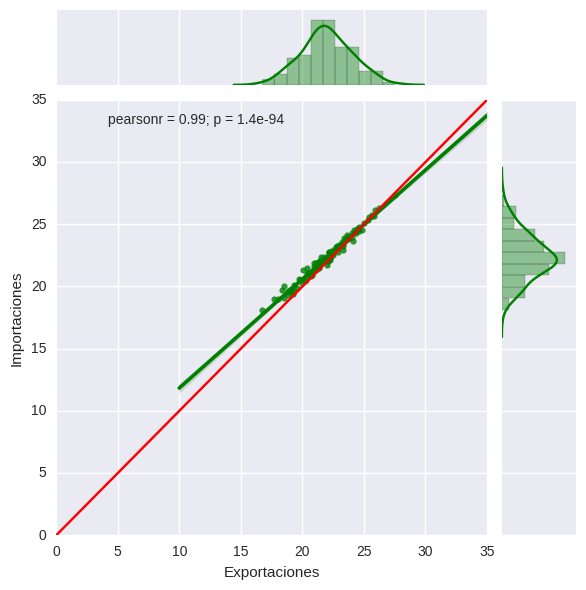

In [167]:
exportaciones = df_sinAgrup[df_sinAgrup["Indicator Code"] == "BX.GSR.TOTL.CD"].set_index("Country Name").loc[:,"2000":"2010"].T
importaciones = df_sinAgrup[df_sinAgrup["Indicator Code"] == "BM.GSR.TOTL.CD"].set_index("Country Name").loc[:,"2000":"2010"].T

import seaborn as sns
importExport = pd.DataFrame()
importExport["Exportaciones"] = np.log(exportaciones.mean())
importExport["Importaciones"] = np.log(importaciones.mean())
sns.jointplot(x = "Exportaciones", y = "Importaciones", data = importExport, kind="reg", color ="green")
plt.plot([0,35],[0,35], color = "red")
plt.xlim([0,35])
plt.ylim([0,35])

En el gráfico se muestran, de color verde, los puntos que representan la media de cada país en importaciones y exportaciones entre los años 2000 y 2010. Además, la línea verde es una recta de regresión sobre esos puntos. La línea roja es una diagonal que comienza en el (0,0), indicando una pendiente de 45 grados hasta el punto (35,35). Esta línea representa los puntos que exactamente tienen el mismo número de importaciones que de exportaciones.

Respondamos a las preguntas anteriores:
1. ¿Los países exportan más que importan, o viceversa?: La mayoría de los puntos se encuentran sobre la diagonal que indicaría igualdad entre importaciones y exportaciones, por lo que significa que la mayoría de los paises importan más que exportan.
2. ¿Existen países con muchas importanciones y bajas exportaciones, o viceversa?: No. Todos los valores están muy próximo a la diagonal, por lo que no existen casos aislados de importaciones masivas respecto a las exportaciones o viceversa.
3. ¿Las exportaciones e importaciones de todos los países en conjunto siguen una regresión?: Si. Se ha calculado una recta de regresión sobre los datos y ha resultado con un R-squared de 0.99, prácticamente perfecta, por lo que se puede asegurar esa regresión lineal.